In [530]:
import skimage
from skimage import color, io, measure, filters
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [531]:
file = 'phone11.jpg'
file_path = '/content/' + file

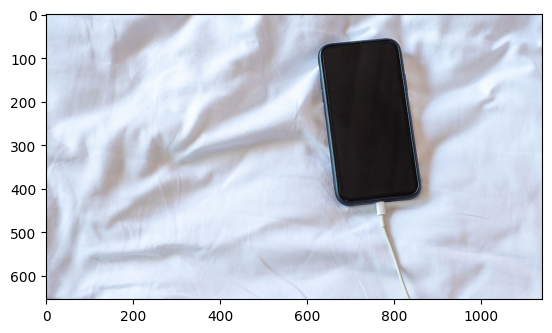

In [532]:
# Загрузим изображение
image = Image.open(file_path)
plt.imshow(image)

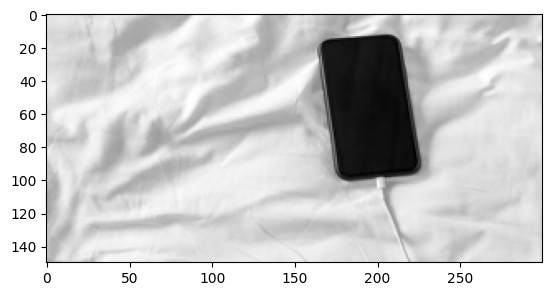

In [533]:
# Приводим к ЧБ и изменяем размер изображения
image = image.convert('L')
image.crop((10, 10, 1130, 655))
image = image.resize((300,150))
plt.imshow(image)

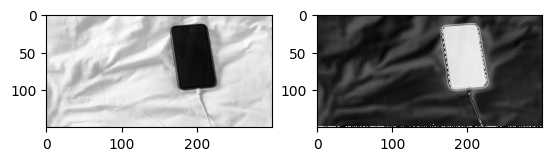

In [534]:
# Используем свертку
kernel = np.array([[ 0,  -1,   0],
                    [-1,  3,  -1],
                    [0,  -1,  0]])
fig, (ax1, ax2) = plt.subplots(1, 2)
image_conv = ndimage.convolve(image, kernel, mode='constant', cval=0.0)
plt.gray()
ax1.imshow(image)
ax2.imshow(image_conv)
plt.show()

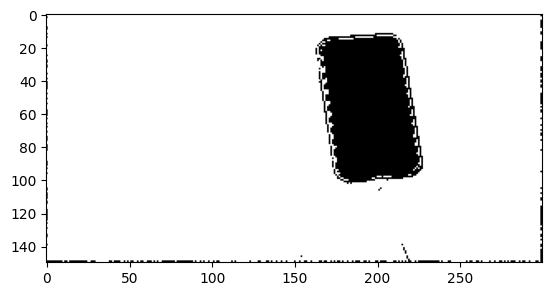

In [535]:
# Конвертируем в бинарный массив
binary_image = np.array(image_conv) < 128  # Пороговая обработка для получения бинарного изображения
plt.imshow(binary_image)

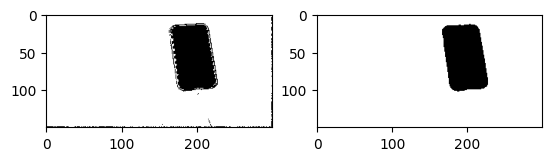

In [536]:
# Применяем медианный фильтр для размытия шума
fig, (ax1, ax2) = plt.subplots(1, 2)
image_blured = ndimage.median_filter(binary_image, size=8)
plt.gray()
ax1.imshow(binary_image)
ax2.imshow(image_blured)
plt.show()

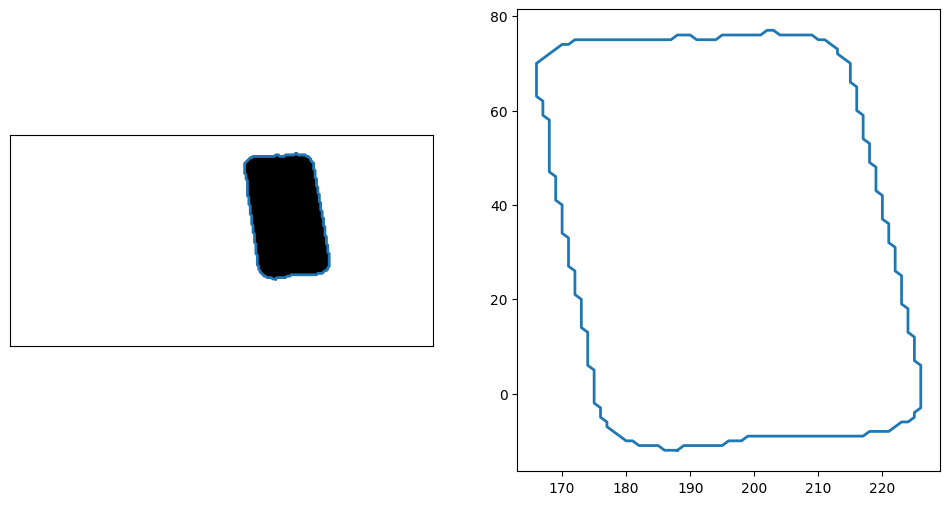

In [537]:
# Получаем контур нашего предмета
contours = skimage.measure.find_contours(image_blured, 0)

fig, axes = plt.subplots(1, 2, figsize = (12,6))
axes[0].imshow(image_blured, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    axes[0].plot(contour[:, 1], contour[:, 0], linewidth=2)
    axes[1].plot(contour[:, 1], 90-contour[:, 0], linewidth=2)

axes[0].axis('image')
axes[0].set_xticks([])
axes[0].set_yticks([])
plt.show()

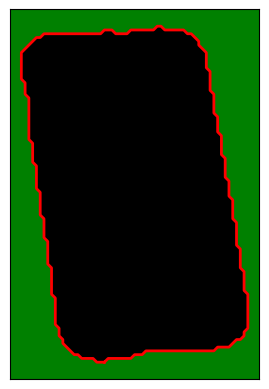

In [538]:
# Сохраним наш контур
contours = sorted(contours, key=lambda x: len(x), reverse=True)
main_contour = contours[0]
fig, ax = plt.subplots()
ax.set(facecolor = "green")
ax.plot(main_contour[:, 1], 90 - main_contour[:, 0], linewidth=2, color='red')
ax.fill(main_contour[:, 1], 90 - main_contour[:, 0], color='black', alpha=1)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
# plt.show()
plt.savefig(f"/content/{file.split('.')[0]}_contour.{file.split('.')[1]}")

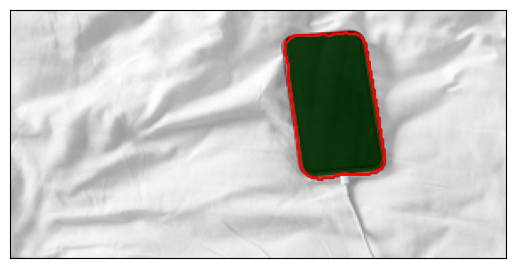

In [539]:
# Добавим наш контур на старое изображение
fig, ax = plt.subplots()
ax.plot(main_contour[:, 1], main_contour[:, 0], linewidth=2, color='red')
ax.fill(main_contour[:, 1], main_contour[:, 0], color='green', alpha=0.3)
ax.imshow(image)
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
# plt.show()
plt.savefig(f"/content/{file.split('.')[0]}_result.{file.split('.')[1]}")

In [540]:
file = 'phone7.jpg'
file_path = '/content/' + file

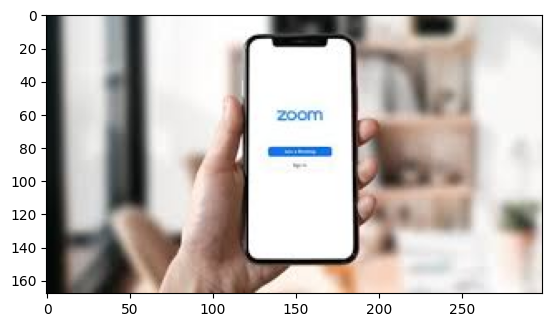

In [541]:
# Загрузим изображение
image = Image.open(file_path)
plt.imshow(image)

In [542]:
image.size

(299, 168)

In [543]:
image = np.array(image)
image.shape

(168, 299, 3)

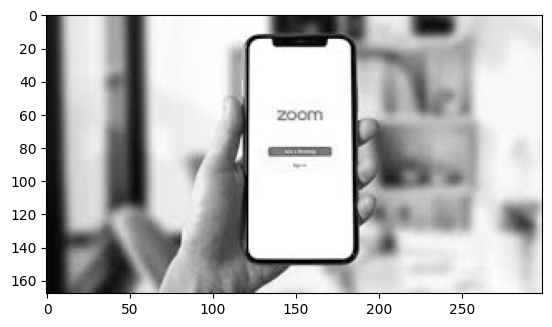

In [544]:
# Приведем фото к ЧБ
image = image / 255.
buf_image = np.zeros((168,299))
for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    buf_image[y][x] = (image[y][x][0] + image[y][x][1] + image[y][x][2]) / 3

image = buf_image * 255.
plt.imshow(image)

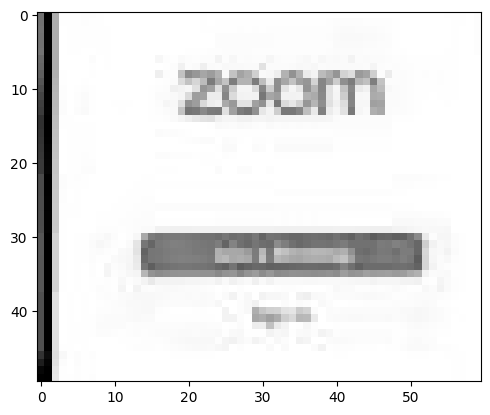

In [545]:
plt.imshow(image[50:100, 120:180])

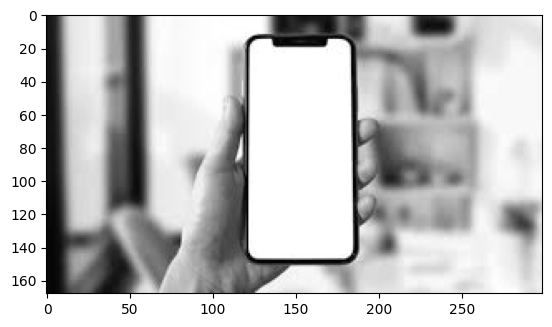

In [546]:
# Уберем надпись "Zoom"
for y in range(40, 120):
  for x in range(125, 180):
    image[y][x] = 255
plt.imshow(image)

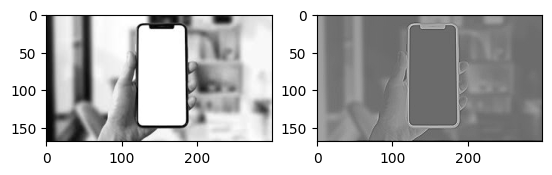

In [547]:
# Используем свертку
kernel = np.array([[ 0,  1,   0],
                    [1, -5,  1],
                    [0,  1,  0]])
fig, (ax1, ax2) = plt.subplots(1, 2)
image_conv = ndimage.convolve(image, kernel, mode='constant', cval=0.0)
plt.gray()
ax1.imshow(image)
ax2.imshow(image_conv)
plt.show()

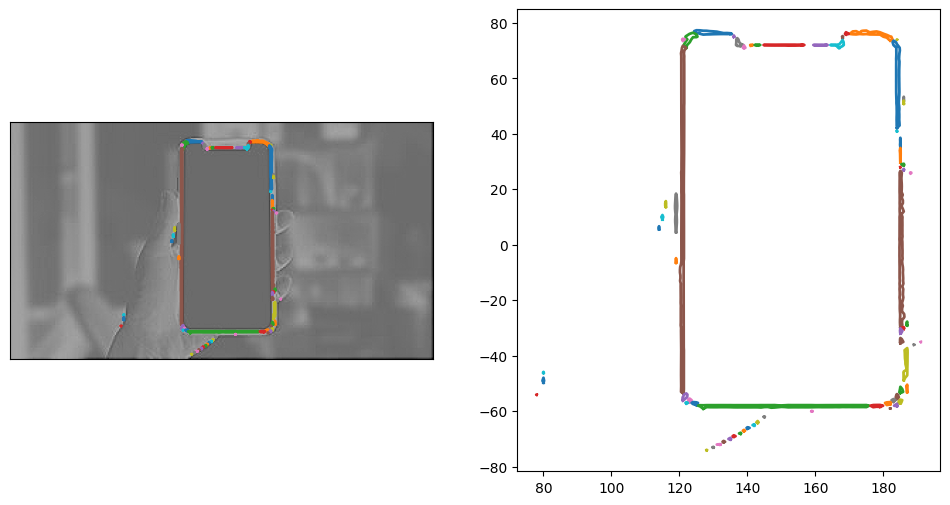

In [548]:
# Находим контур нашего предмета
contours = skimage.measure.find_contours(image_conv, 80)
fig, axes = plt.subplots(1, 2, figsize = (12,6))
axes[0].imshow(image_conv, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    axes[0].plot(contour[:, 1], contour[:, 0], linewidth=2)
    axes[1].plot(contour[:, 1], 90-contour[:, 0], linewidth=2)

axes[0].axis('image')
axes[0].set_xticks([])
axes[0].set_yticks([])
plt.show()

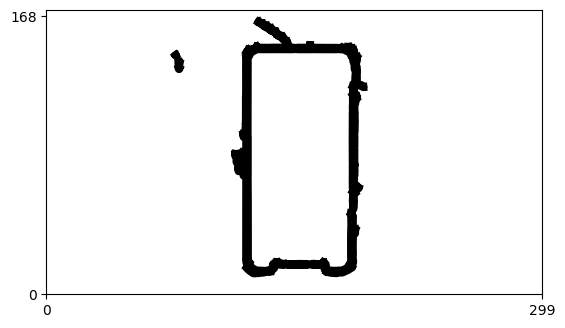

In [549]:
# Запишем наш контур
fig, ax = plt.subplots()
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], color='black', linewidth=6)
ax.axis('image')
ax.set_xticks([0,299])
ax.set_yticks([0,168])
# plt.show()
plt.savefig(f"/content/{file.split('.')[0]}_contour.{file.split('.')[1]}")

(640, 480)


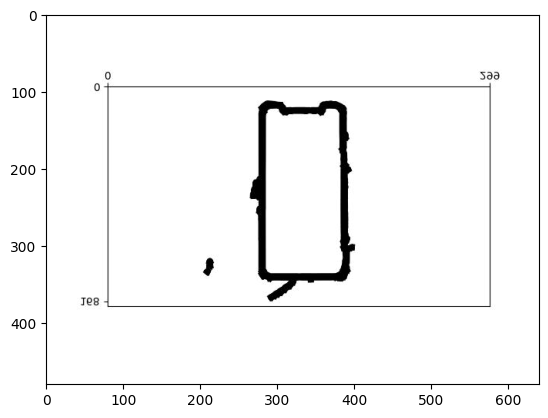

In [550]:
# Считаем наш контур
contour_file = Image.open(f"/content/{file.split('.')[0]}_contour.{file.split('.')[1]}").convert('L')
print(contour_file.size)
rotated_image = contour_file.rotate(180)
rotated_image = rotated_image.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(rotated_image)

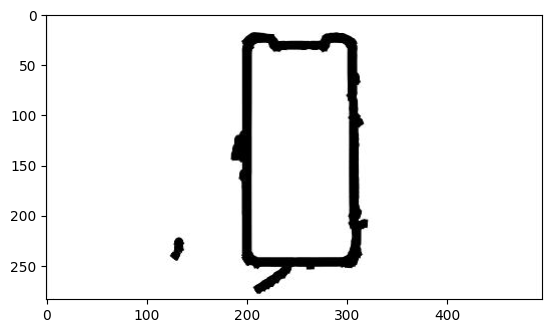

In [551]:
plt.imshow(np.array(rotated_image)[94:378, 80:575])

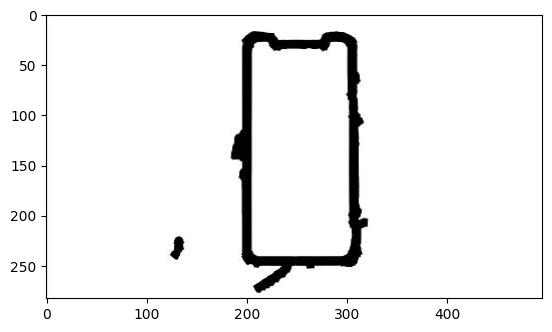

In [552]:
# Обрежем фото контура от шкал
cropped_image = rotated_image.crop((80, 95, 575, 378))
plt.imshow(cropped_image)

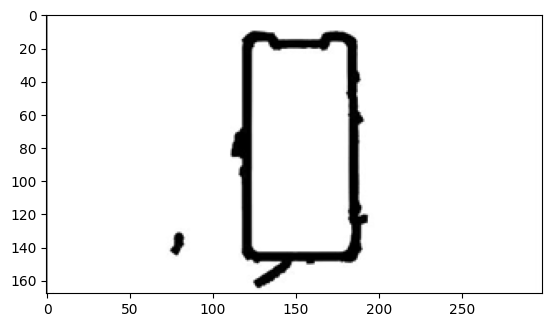

In [553]:
cropped_image = cropped_image.resize((299,168))
plt.imshow(cropped_image)

In [554]:
cropped_image = np.array(cropped_image)

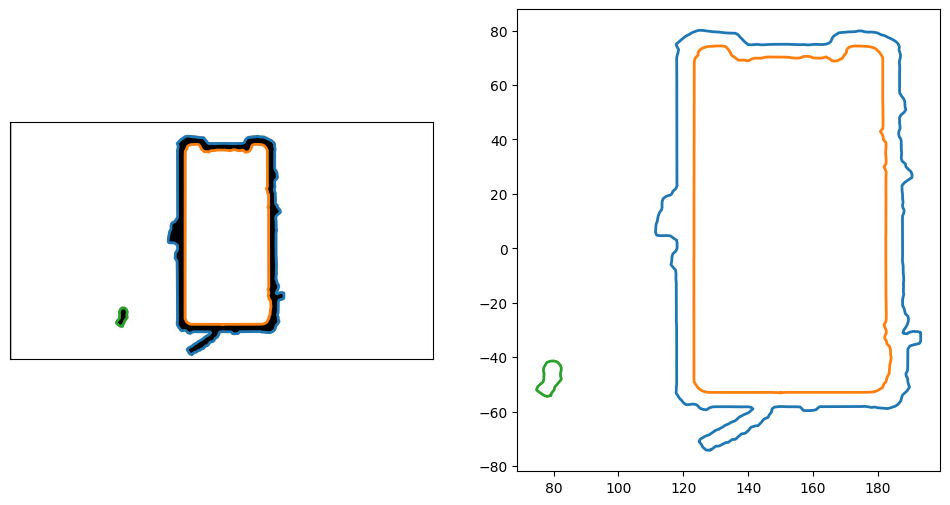

In [555]:
# Получим контур нашего контура
contours = skimage.measure.find_contours(cropped_image, 80)
fig, axes = plt.subplots(1, 2, figsize = (12,6))
axes[0].imshow(cropped_image, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    axes[0].plot(contour[:, 1], contour[:, 0], linewidth=2)
    axes[1].plot(contour[:, 1], 90-contour[:, 0], linewidth=2)

axes[0].axis('image')
axes[0].set_xticks([])
axes[0].set_yticks([])
plt.show()

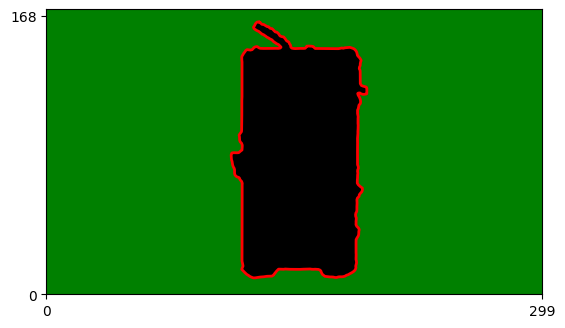

In [556]:
# Сохраним наш финальный контур
contours = sorted(contours, key=lambda x: len(x), reverse=True)
main_contour = contours[0]
fig, ax = plt.subplots()
ax.set(facecolor = "green")
ax.plot(main_contour[:, 1], main_contour[:, 0], linewidth=2, color='red')
ax.fill(main_contour[:, 1], main_contour[:, 0], color='black', alpha=1)

ax.axis('image')
ax.set_xticks([0,299])
ax.set_yticks([0,168])
# plt.show()
plt.savefig(f"/content/{file.split('.')[0]}_contour_final.{file.split('.')[1]}")

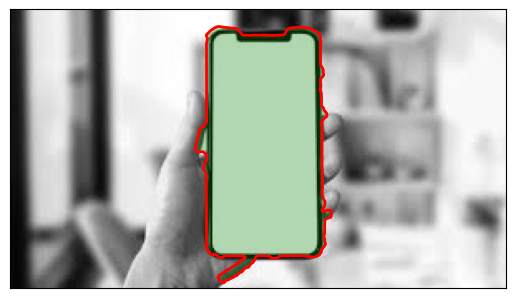

In [557]:
# Нарисуем наш контур на исходном изображении
fig, ax = plt.subplots()
ax.plot(main_contour[:, 1], main_contour[:, 0], linewidth=2, color='red')
ax.fill(main_contour[:, 1], main_contour[:, 0], color='green', alpha=0.3)
ax.imshow(image)
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
# plt.show()
plt.savefig(f"/content/{file.split('.')[0]}_result.{file.split('.')[1]}")